In [1]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.2.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [96.6 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:14 http:

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
ufo_data_df = pd.read_csv("/content/sample_data/ufo_pop_merge.csv")
ufo_data_df.head()

,Unnamed: 0,summary,date_time,shape,duration,stats,text,posted,city_latitude,city_longitude,key,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,light,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-04-17T20:00:00,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,1,Star-like UFO and strange sound.,2020-05-17T21:00:00,light,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-05-17T21:00:00,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,cross,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,Litchfield Park2004-07-20T19:45:00,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,3,to dark to see color.,2004-04-20T08:45:00,triangle,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,Litchfield Park2004-04-20T08:45:00,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,triangle,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,Litchfield Park2005-08-19T20:30:00,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361


In [6]:
ufo_data_df['City'].value_counts().head(20)

Phoenix             617
Tucson              370
Mesa                215
Scottsdale          144
Gilbert             144
Chandler            138
Tempe               107
Glendale            101
Surprise             77
Sedona               74
Lake Havasu City     73
Peoria               71
Maricopa             65
Yuma                 61
Buckeye              54
Kingman              51
Prescott Valley      49
Queen Creek          46
Prescott             43
Flagstaff            41
Name: City, dtype: int64

In [7]:
ufo_data_df['City'] = ufo_data_df['City'].apply(lambda x: x if x in ('Litchfield', 'Tucson', 'Phoenix', 'Gilbert', 'Tempe', 'Glendale', 'Bullhead City', 'Peoria', 'Chandler', 'Cottonwood', 'Prescott', 'Payson', 'Page', 'Yuma', 'Sun City', 'Salome', 'Sierra Vista', 'Prescott Valley', 'Sedona', 'Anthem', 'Lake Havasu City', 'Florence', 'Apache Junction', 'Queen Creek', 'Tonopah', 'Show Low', 'Scottsdale', 'Marana', 'Goodyear', 'Kingman', 'Buckeye', 'Arizona City', 'Cave Creek', 'Fountain Hills', 'Topock', 'Green Valley', 'Eloy', 'Amado', 'Nogales', 'Chino Valley', 'Surprise', 'Holbrook', 'Camp Verde', 'Paradise Valley', 'Maricopa', 'Quartzite', 'Avondale', 'Bagdad', 'Morenci', 'Flagstaff', 'Safford', 'Douglas', 'Coolidge', 'Carefree', 'Casa Grande', 'Gila Bend', 'Tombstone', 'Huachuca City', 'Clarkdale', 'Pima', 'Patagonia', 'Williams', 'Sahuarita', 'Globe', 'Benson', 'Tolleson', 'Kearny', 'Wickenburg', 'Snowflake', 'Winslow', 'Parker', 'Willcox', 'San Luis', 'Springerville', 'Whiteriver', 'Wellton', 'Eagar', 'Duncan', 'El Mirage', 'Thatcher', 'Pine', 'Concho', 'Somerton', 'Clifton', 'Many Farms') else 'Other')

In [8]:
ufo_data_df[['Year','Population']] = ufo_data_df[['Year','Population']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())

In [9]:
X = ufo_data_df[['Year','Population', 'shape', 'City']].copy()
X['shape'] = LabelEncoder().fit_transform(X['shape'])
X['City'] = LabelEncoder().fit_transform(X['City'])
X = X.dropna()
X.head()

,Year,Population,shape,City
0,0.000002,0.000007,13,44
1,0.000002,0.000007,13,44
2,0.000002,0.000004,5,44
3,0.000002,0.000004,19,44
4,0.000002,0.000004,19,44


In [10]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[9.52380952e-01, 4.07200519e-03, 6.50000000e-01, 5.30120482e-01],
       [9.52380952e-01, 4.07200519e-03, 6.50000000e-01, 5.30120482e-01],
       [1.90476190e-01, 2.35694442e-03, 2.50000000e-01, 5.30120482e-01],
       ...,
       [9.52380952e-01, 8.44442858e-03, 1.50000000e-01, 7.95180723e-01],
       [9.52380952e-01, 2.33850291e-03, 6.50000000e-01, 1.92771084e-01],
       [9.52380952e-01, 7.38255433e-04, 6.00000000e-01, 4.69879518e-01]])

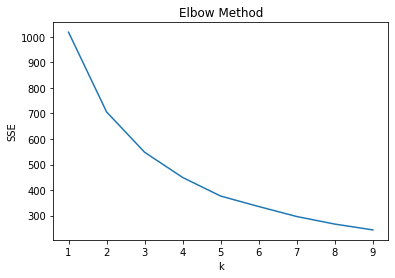

In [11]:
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [12]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [13]:
# Calculate predicted values.
y_pred = model.predict(X_scaled)

In [14]:
# Add prediected values onto the original dataframe
ufo_data_df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = ufo_data_df.join(ufo_data_df_y, how='inner')
combined.head()

,Unnamed: 0,summary,date_time,shape,duration,stats,text,posted,city_latitude,city_longitude,...,date_str,time_str,year,month_x,day_x,City,State,Year,Population,Cluster
0,0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,light,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,...,2020-04-17,20:00:00,2020,4,17,Other,AZ,0.000002,0.000007,1
1,1,Star-like UFO and strange sound.,2020-05-17T21:00:00,light,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,...,2020-05-17,21:00:00,2020,5,17,Other,AZ,0.000002,0.000007,1
2,2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,cross,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,...,2004-07-20,19:45:00,2004,7,20,Other,AZ,0.000002,0.000004,0
3,3,to dark to see color.,2004-04-20T08:45:00,triangle,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,...,2004-04-20,08:45:00,2004,4,20,Other,AZ,0.000002,0.000004,0
4,4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,triangle,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,...,2005-08-19,20:30:00,2005,8,19,Other,AZ,0.000002,0.000004,0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


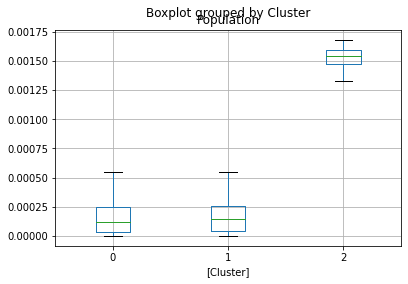

In [16]:
# Plot boxplots of the official time distributions by cluster
combined.boxplot(['Population'], by=['Cluster'])

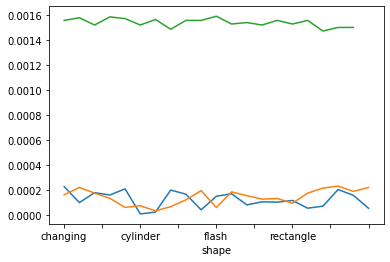

In [18]:
# Plot median finish times by division for each cluster
combined[combined['Cluster'] == 0].groupby('shape').median()['Population'].plot()
combined[combined['Cluster'] == 1].groupby('shape').median()['Population'].plot()
combined[combined['Cluster'] == 2].groupby('shape').median()['Population'].plot()